# Análise e Agrupamento de Clientes com K-Means

#### Import libs

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings('ignore')
py.offline.init_notebook_mode(connected = True)

## Análise dos Dados

##### Carregando base de dados

In [10]:
clients = pd.read_csv(r'Datasets/Mall_Customers.csv')

In [12]:
clients.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
clients.shape

(200, 5)

Estatística Descritiva

In [14]:
clients.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Tipos de dados

In [17]:
clients.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Verificando registros nulos

In [19]:
clients.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Visualização dos dados

In [21]:
plt.style.use('fivethirtyeight')

Verificando Distribuição dos dados

In [24]:
clients.columns[2:]

Index(['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

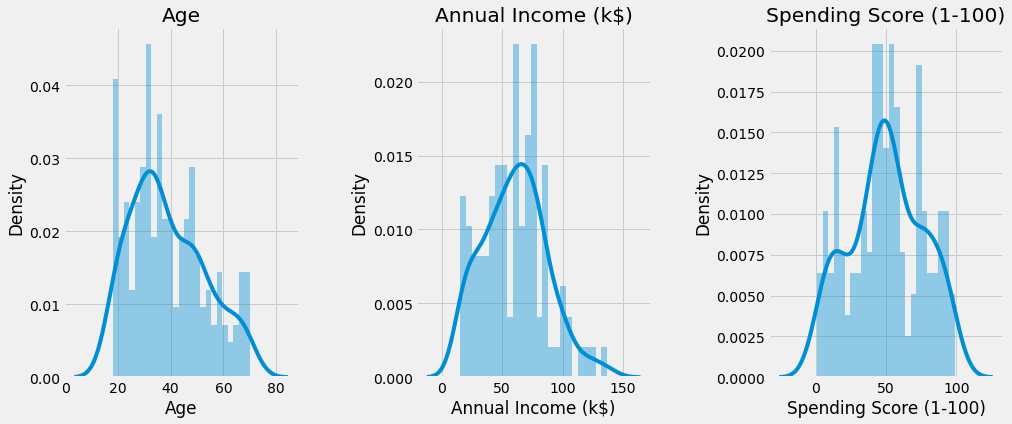

In [31]:
plt.figure(1, figsize = (15, 6))
n = 0
for x in clients.columns[2:]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(clients[x], bins=25)
    plt.title(f'{x}')
plt.show()

Contagem de Amostras por Sexo

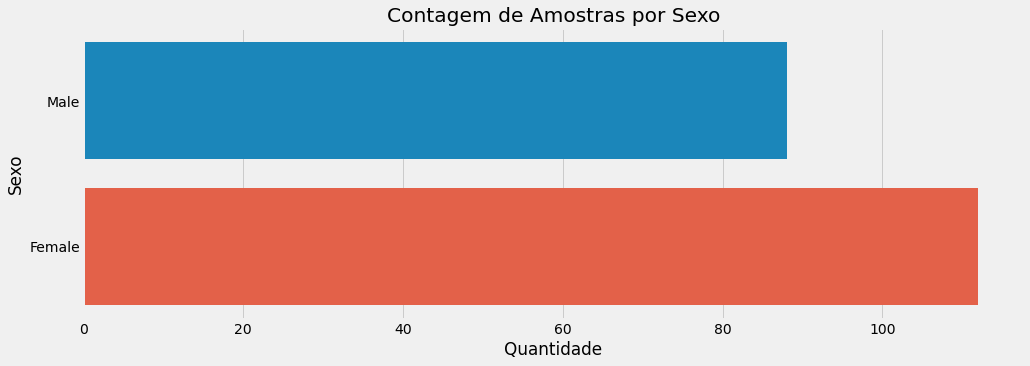

In [41]:
plt.figure(1, figsize = (15, 5))
sns.countplot(y='Genre', data=clients)
plt.xlabel('Quantidade'), plt.ylabel('Sexo')
plt.title('Contagem de Amostras por Sexo')
plt.show()

Idade vs Renda Anual

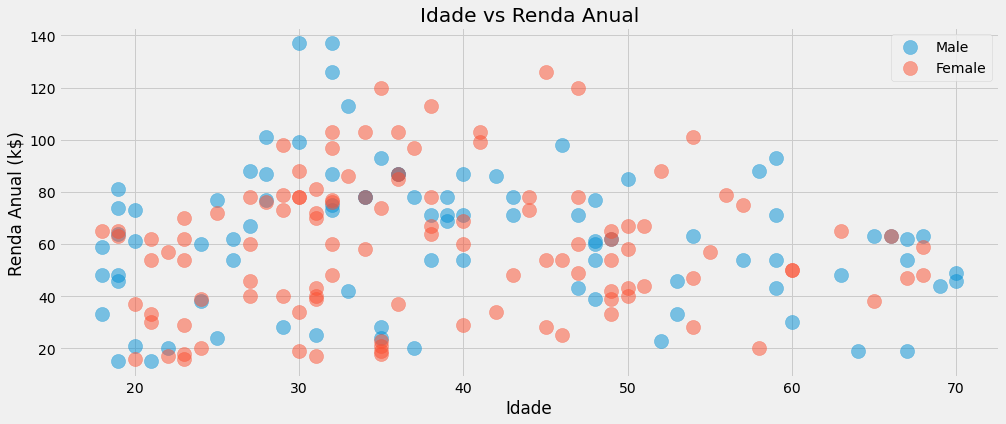

In [40]:
plt.figure(1, figsize = (15, 6))
for genre in clients.Genre.unique():
    plt.scatter(x="Age", y="Annual Income (k$)", 
                data= clients[clients['Genre'] == genre], s=200, alpha=0.5, label=genre)
plt.xlabel('Idade'), plt.ylabel('Renda Anual (k$)')
plt.title('Idade vs Renda Anual')
plt.legend()
plt.show()

Renda Anual vs Pontuação de Gastos

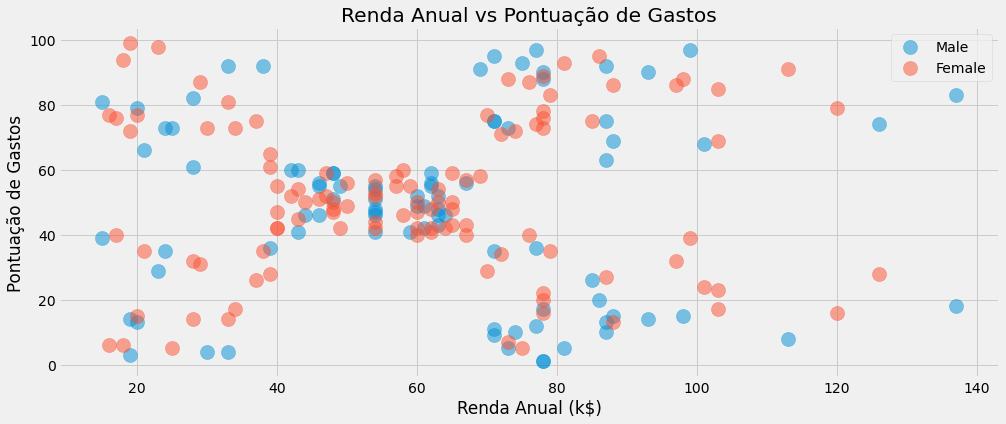

In [39]:
plt.figure(1, figsize=(15, 6))
for genre in clients.Genre.unique():
    plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)",
                data= clients[clients['Genre'] == genre], s=200, alpha=0.5, label=genre)
plt.xlabel('Renda Anual (k$)'), plt.ylabel('Pontuação de Gastos')
plt.title('Renda Anual vs Pontuação de Gastos')
plt.legend()
plt.show()

Distribuição de Idade, Renda Anual e Pontuação de Gastos segmentados por Sexo

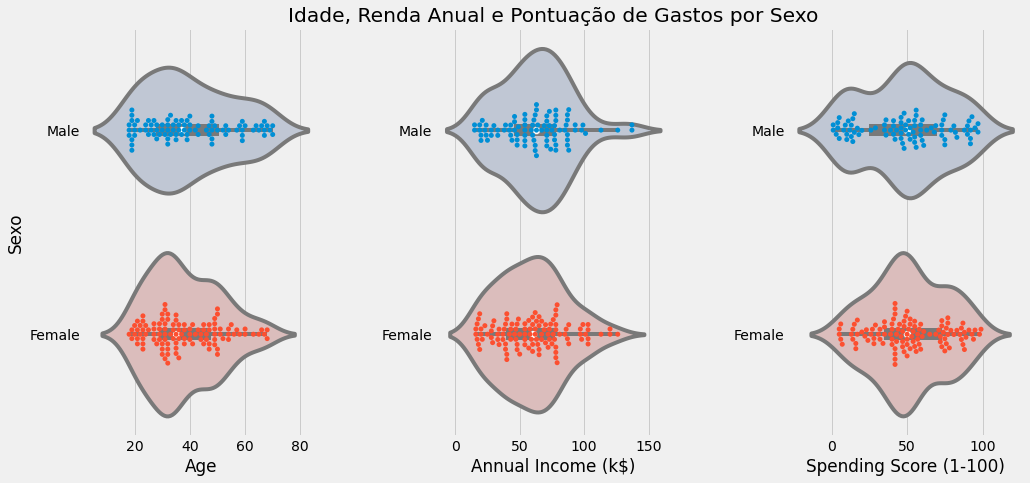

In [43]:
plt.figure(1, figsize=(15, 7))
n = 0
for cols in clients.columns[2:]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x=cols, y='Genre', data=clients, palette='vlag')
    sns.swarmplot(x=cols, y='Genre', data=clients)
    plt.ylabel('Sexo' if n == 1 else '')
    plt.title('Idade, Renda Anual e Pontuação de Gastos por Sexo' if n == 2 else '')
plt.show()

# Agrupamento de dados utilizando K-Means

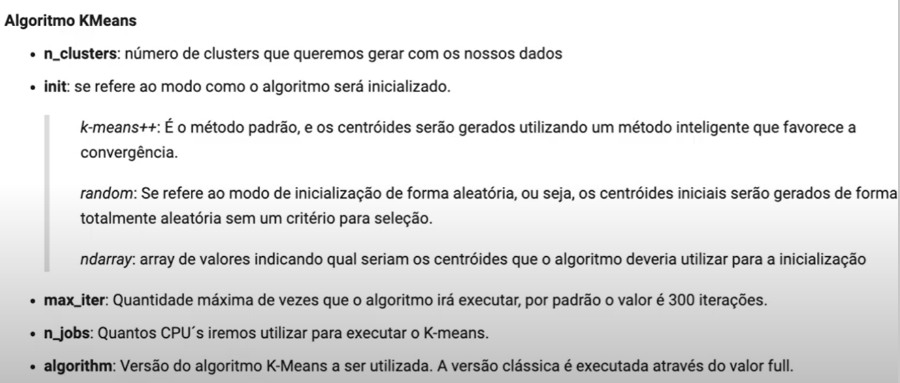
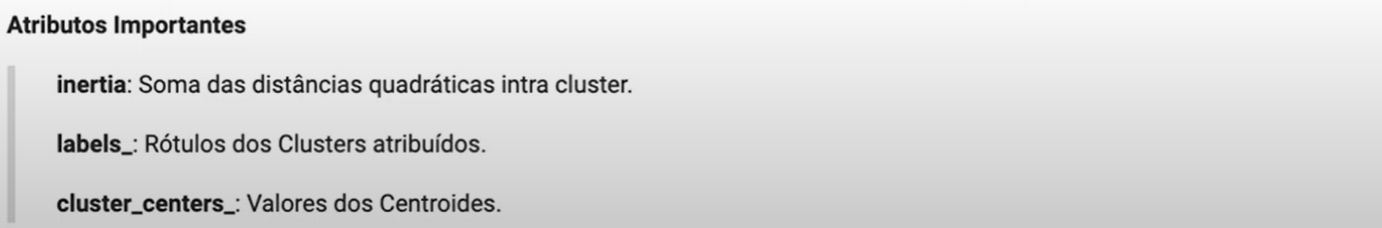

 Selecionando o número de clusters através do método Elbow (Soma das distâncias quadráticas intra clusters).

In [49]:
X2 = clients[["Annual Income (k$)", "Spending Score (1-100)"]].iloc[: , :].values
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n))
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

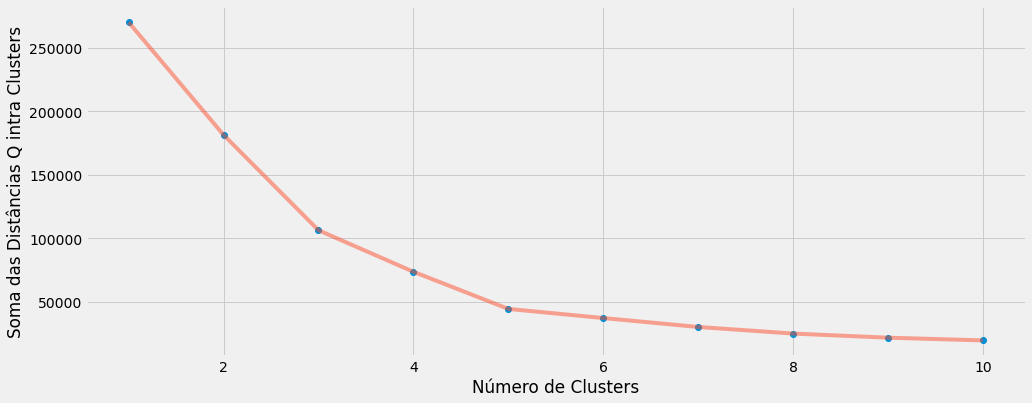

In [52]:
plt.figure(1, figsize=(15, 6))
plt.plot(np.arange(1, 11), inertia, 'o')
plt.plot(np.arange(1, 11), inertia, '-', alpha=0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('Soma das Distâncias Q intra Clusters')
plt.show()

Iniciando e Computando o KMeans com o valor de 4 Clusters

In [54]:
algorithm = (KMeans(n_clusters=4))
algorithm.fit(X2)

KMeans(n_clusters=4)

Visualizando os grupos criados e seus centroides

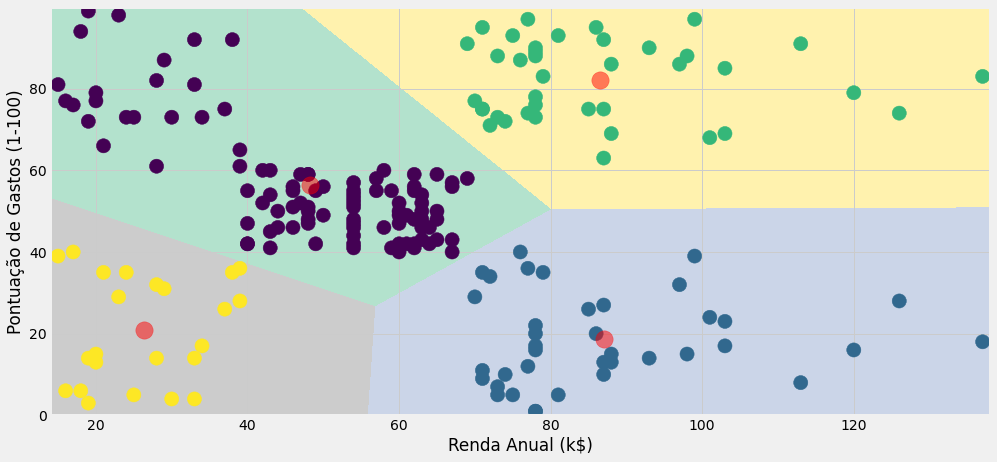

In [62]:
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1, figsize=(15, 7))
plt.clf()
Z2 = Z.reshape(xx.shape)
plt.imshow(Z2, interpolation='nearest', extent=(xx.min(), xx.max(), yy.min(), yy.max()), 
           cmap=plt.cm.Pastel2, aspect='auto', origin='lower')
plt.scatter(x='Annual Income (k$)', y='Spending Score (1-100)', data=clients, 
            c=labels2, s=200)
plt.scatter(x=centroids2[: , 0], y=centroids2[: , 1], 
            c='red', s=300, alpha=0.5)
plt.ylabel('Pontuação de Gastos (1-100)'), plt.xlabel('Renda Anual (k$)')
plt.show()

Analisando os dados agrupados

In [65]:
clients["clusters"] = algorithm.labels_

In [66]:
clients.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [68]:
clients_group = clients.drop(["CustomerID", "Age"], axis=1).groupby("clusters")

In [70]:
clients_group.describe()

Annual Income (k$)                                                  \
                      count       mean        std   min    25%   50%    75%   
clusters                                                                      
0                     100.0  48.260000  14.562731  15.0  40.00  50.0  60.25   
1                      38.0  87.000000  16.271348  70.0  76.25  80.0  96.00   
2                      39.0  86.538462  16.312485  69.0  75.50  79.0  95.00   
3                      23.0  26.304348   7.893811  15.0  19.50  25.0  33.00   

                Spending Score (1-100)                                     \
            max                  count       mean        std   min    25%   
clusters                                                                    
0          69.0                  100.0  56.480000  14.190963  40.0  46.75   
1         137.0                   38.0  18.631579  10.915947   1.0  10.25   
2         137.0                   39.0  82.128205   9.364489  63.0  74.50   
3          39.0                   23.0  20.913043  13.017167   3.0   9.50   

                             
           50%    75%   max  
clusters                     
0         52.5  60.00  99.0  
1         16.5  26.75  40.0  
2         83.0  90.00  97.0  
3         17.0  33.50  40.0